In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
import warnings
import seaborn as sb
from scipy import stats
from imblearn.over_sampling import SMOTE

## Data Preprocessing

In [33]:
TRAIN_SET_PATH = "data/cs-training.csv"

TEST_SET_PATH = "data/cs-test.csv"

In [34]:
train_df = pd.read_csv(TRAIN_SET_PATH).drop(columns="Unnamed: 0")
test_df = pd.read_csv(TEST_SET_PATH).drop(columns=["SeriousDlqin2yrs", "Unnamed: 0"])
print(train_df.shape)
print(test_df.shape)

(150000, 11)
(101503, 10)


In [35]:
train_df.info()
test_df.info()
# In both sets, the MonthlyIncome and NumberOfDependents fields contain null entries - these can be imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

#### Imputation using MICE

In [36]:
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
train_df_imputed = pd.DataFrame(mice_imputer.fit_transform(train_df), columns=train_df.columns)
test_df_imputed = pd.DataFrame(mice_imputer.fit_transform(test_df), columns=test_df.columns)
train_df_imputed.info()
test_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 7   NumberOfTimes90DaysLate               150000 non-null  float64
 8   NumberRealEstateLoansOrLines          150000 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 10  NumberOfDependents                    150000 non-null  float64
dtype

#### Outlier Treatment

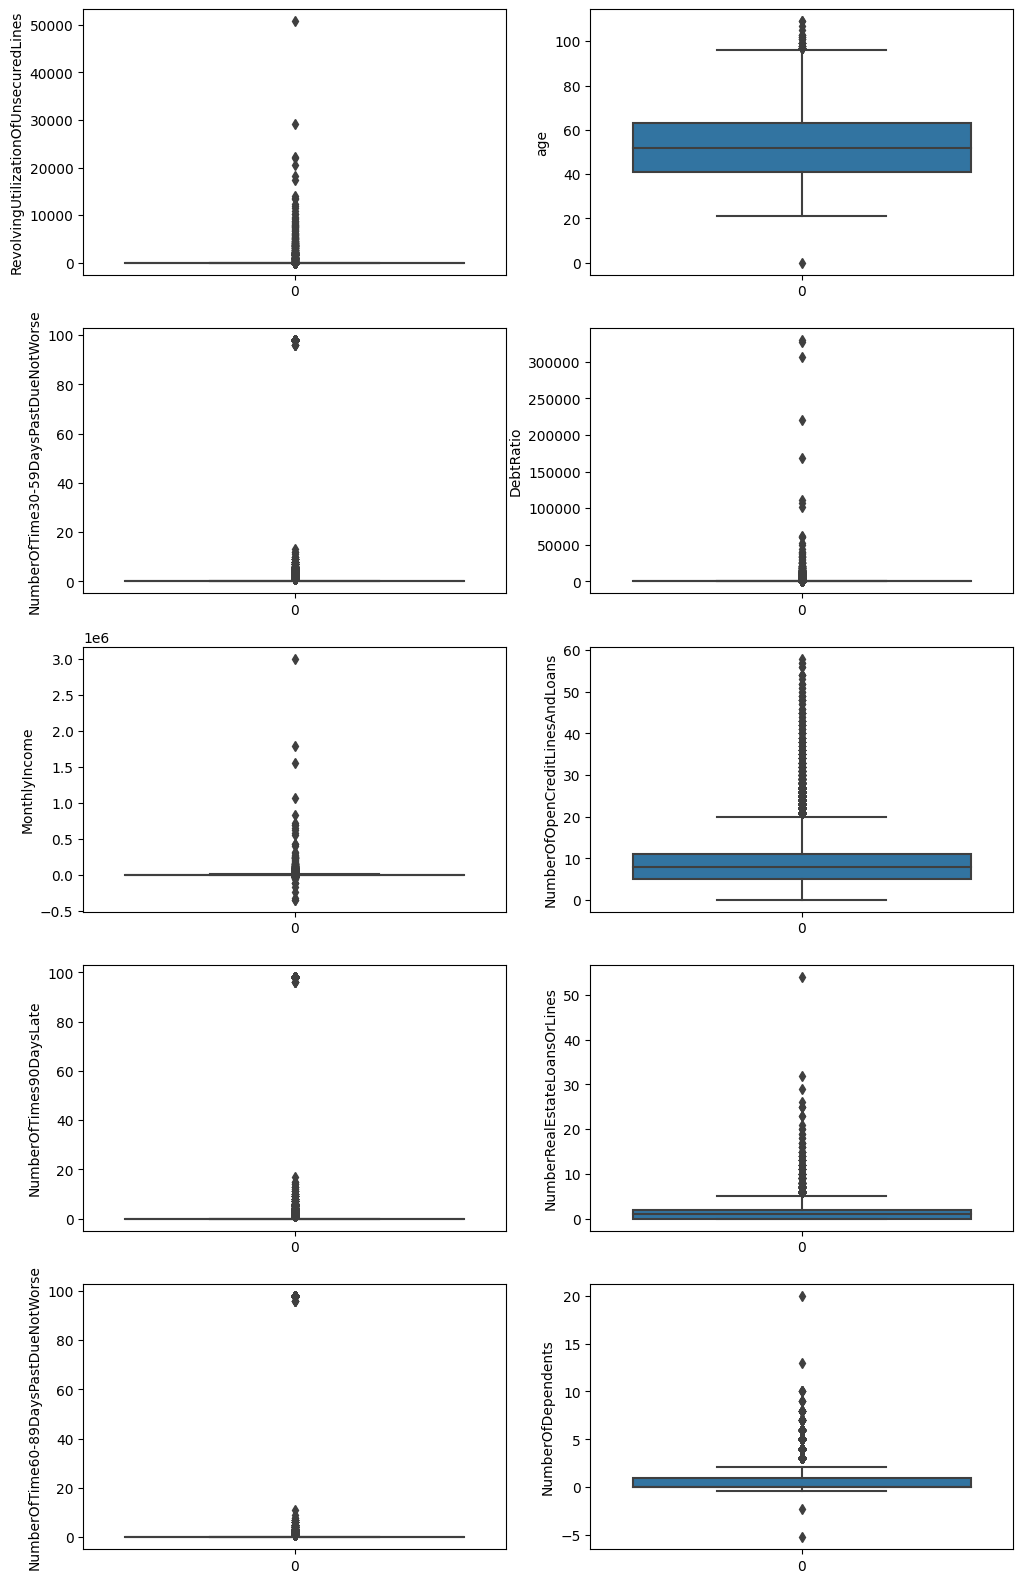

In [37]:
# Examine the nature of outliers using box-and-whisker plots before selecting an outlier treatment method
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,20))
train_df_drop_target = train_df_imputed.columns.drop("SeriousDlqin2yrs")
for i, col in enumerate(train_df_drop_target):
    plt.subplot(5, 2, i+1)
    sb.boxplot(data=train_df_imputed[col])
    plt.ylabel(col)

plt.show()

In [38]:
# Remove entries containing any value more than 3 standard deviations from the mean
train_df_filtered = train_df_imputed[(np.abs(stats.zscore(train_df_imputed.loc[: , train_df_imputed.columns!="SeriousDlqin2yrs"])) < 3).all(axis="columns")]
print(train_df_filtered.shape)
train_df_filtered.sample(20)

(144556, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
80346,0.0,0.011816,52.0,0.0,1177.000000,4545.844110,6.0,0.0,1.0,0.0,0.00000
144632,0.0,0.171366,53.0,0.0,435.000000,4190.768706,3.0,0.0,0.0,0.0,0.54874
84095,0.0,0.247643,82.0,0.0,0.042986,3000.000000,13.0,0.0,0.0,0.0,0.00000
3700,0.0,0.098067,32.0,0.0,248.000000,1.000000,7.0,0.0,0.0,0.0,4.00000
13861,0.0,0.464143,72.0,0.0,0.758258,6750.000000,12.0,0.0,2.0,0.0,1.00000
93477,0.0,0.013090,51.0,0.0,1026.000000,4332.991935,3.0,0.0,1.0,0.0,0.00000
101812,0.0,0.824203,53.0,0.0,0.689333,4499.000000,11.0,0.0,1.0,0.0,1.00000
110234,0.0,0.685022,46.0,0.0,3685.000000,3320.470437,8.0,0.0,1.0,0.0,2.00000
27380,0.0,0.095727,51.0,0.0,0.502300,5000.000000,8.0,0.0,2.0,0.0,1.00000
65524,0.0,1.000000,57.0,0.0,0.094599,10200.000000,2.0,0.0,1.0,0.0,2.00000


## Part 1: Data Analysis

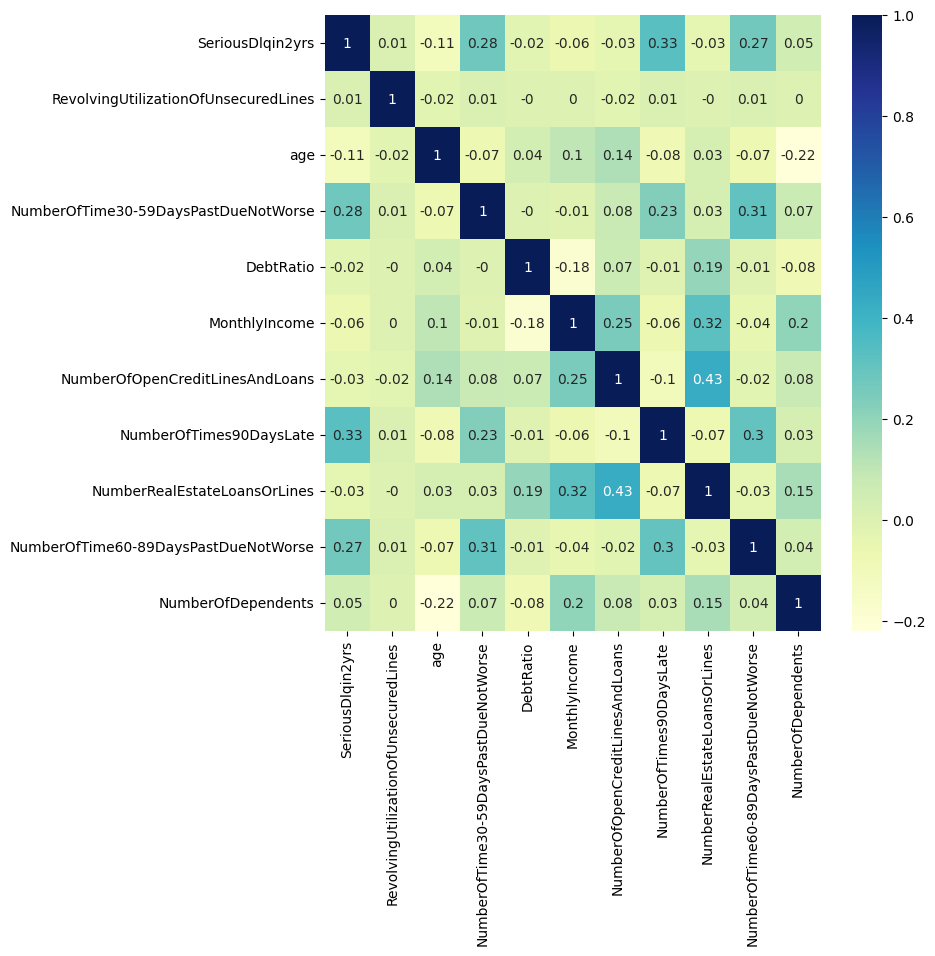

In [40]:
corr_matrix = train_df_filtered.corr().round(2)
fig, axs = plt.subplots(figsize=(8,8))
sb.heatmap(corr_matrix, cmap="YlGnBu", xticklabels = corr_matrix.columns, yticklabels = corr_matrix.columns, annot=True)
fig.show()

#### Question 1

This correlation matrix indicates that the following factors, in descending order, have the strongest positive correlation with probability of loan default:
1. NumberOfTimes90DaysLate
2. NumberOfTime30-59DaysPastDueNotWorse
3. NumberOfTime60-89DaysPastDueNotWorse

This is expected because each of these three attributes reflect tardiness in personal financial practice. This, in turn, may correspond to a higher probability of financial distress.


The following factors, in descending order, have the strongest negative correlation with probability of loan default:
1. Age
2. MontlyIncome

This is expected because financial stability tends to increase with age (anectodatally) and monthly income further reflects this financial stability. Financial stability can be thought of as an opposite to financial distress, explaining this negative correlation.

#### Question 2

We can analyse interaction effects using correlation values from the matrix above. Correlation indicates the degree of relatedness between two given variables. Positive values indicate that a higher value in one variable tends to correspond to higher values in the other. Negative values indicate the inverse relationship. Large magnitudes indicate a strong relationship; small magnitudes indicate a weak relation. These facts can be used to extract meaning from the matrix:
1. There is a relatively strong positive correlation between the number of real estate and credit lines/loans that are open. This is sensible because real estate lines/loans are a subset of credit lines/loans. An increase in the former implies an increase in the latter.
2. There is a relatively strong positive correlation between the number of open credit/real estate lines/loans and monthly income. This may be explained by the fact that those with greater monthly income are in a better position (and thus more likely to) to acquire credit lines/loans.
3. Monthly income and number of dependents have a positive correlation. This may be because those with more dependents require a greater income to support those dependents.
4. There is a strong negative relation between monthly income and debt ratio. This is expected because those with higher monthly income would need to acquire fewer assets via debt.
5. Age is negatively correlated to the number of dependents. This is because as an individual ages, their children tend to become increasingly independent (financially).
6. There is a strong positive correlation between the number of times one is 60-89 days overdue and the number of times one is 90+ days overdue. This relationship doesn't imply causation between the two variables; instead, it likely emerges from the fact that the underlying causes for both issues are similar. This can be verified by noting the rows for each of these two variables: the rows have a very similar heat pattern, indicating potentially similar root causes.

#### Question 3

##### Creating a pairplot to visually observe patterns
These plots can help reveal whether techniques like SVM are likely to generate strong fits, or whether more complex techniques should be attempted. In this case, we see relatively strong separating lines for some pairings, and far more arbitrary arrangments in others (blue represents negatives, orange represents positives). This means that a technique like SVM may not be able to capture the complexity of the dataset (it will underfit).

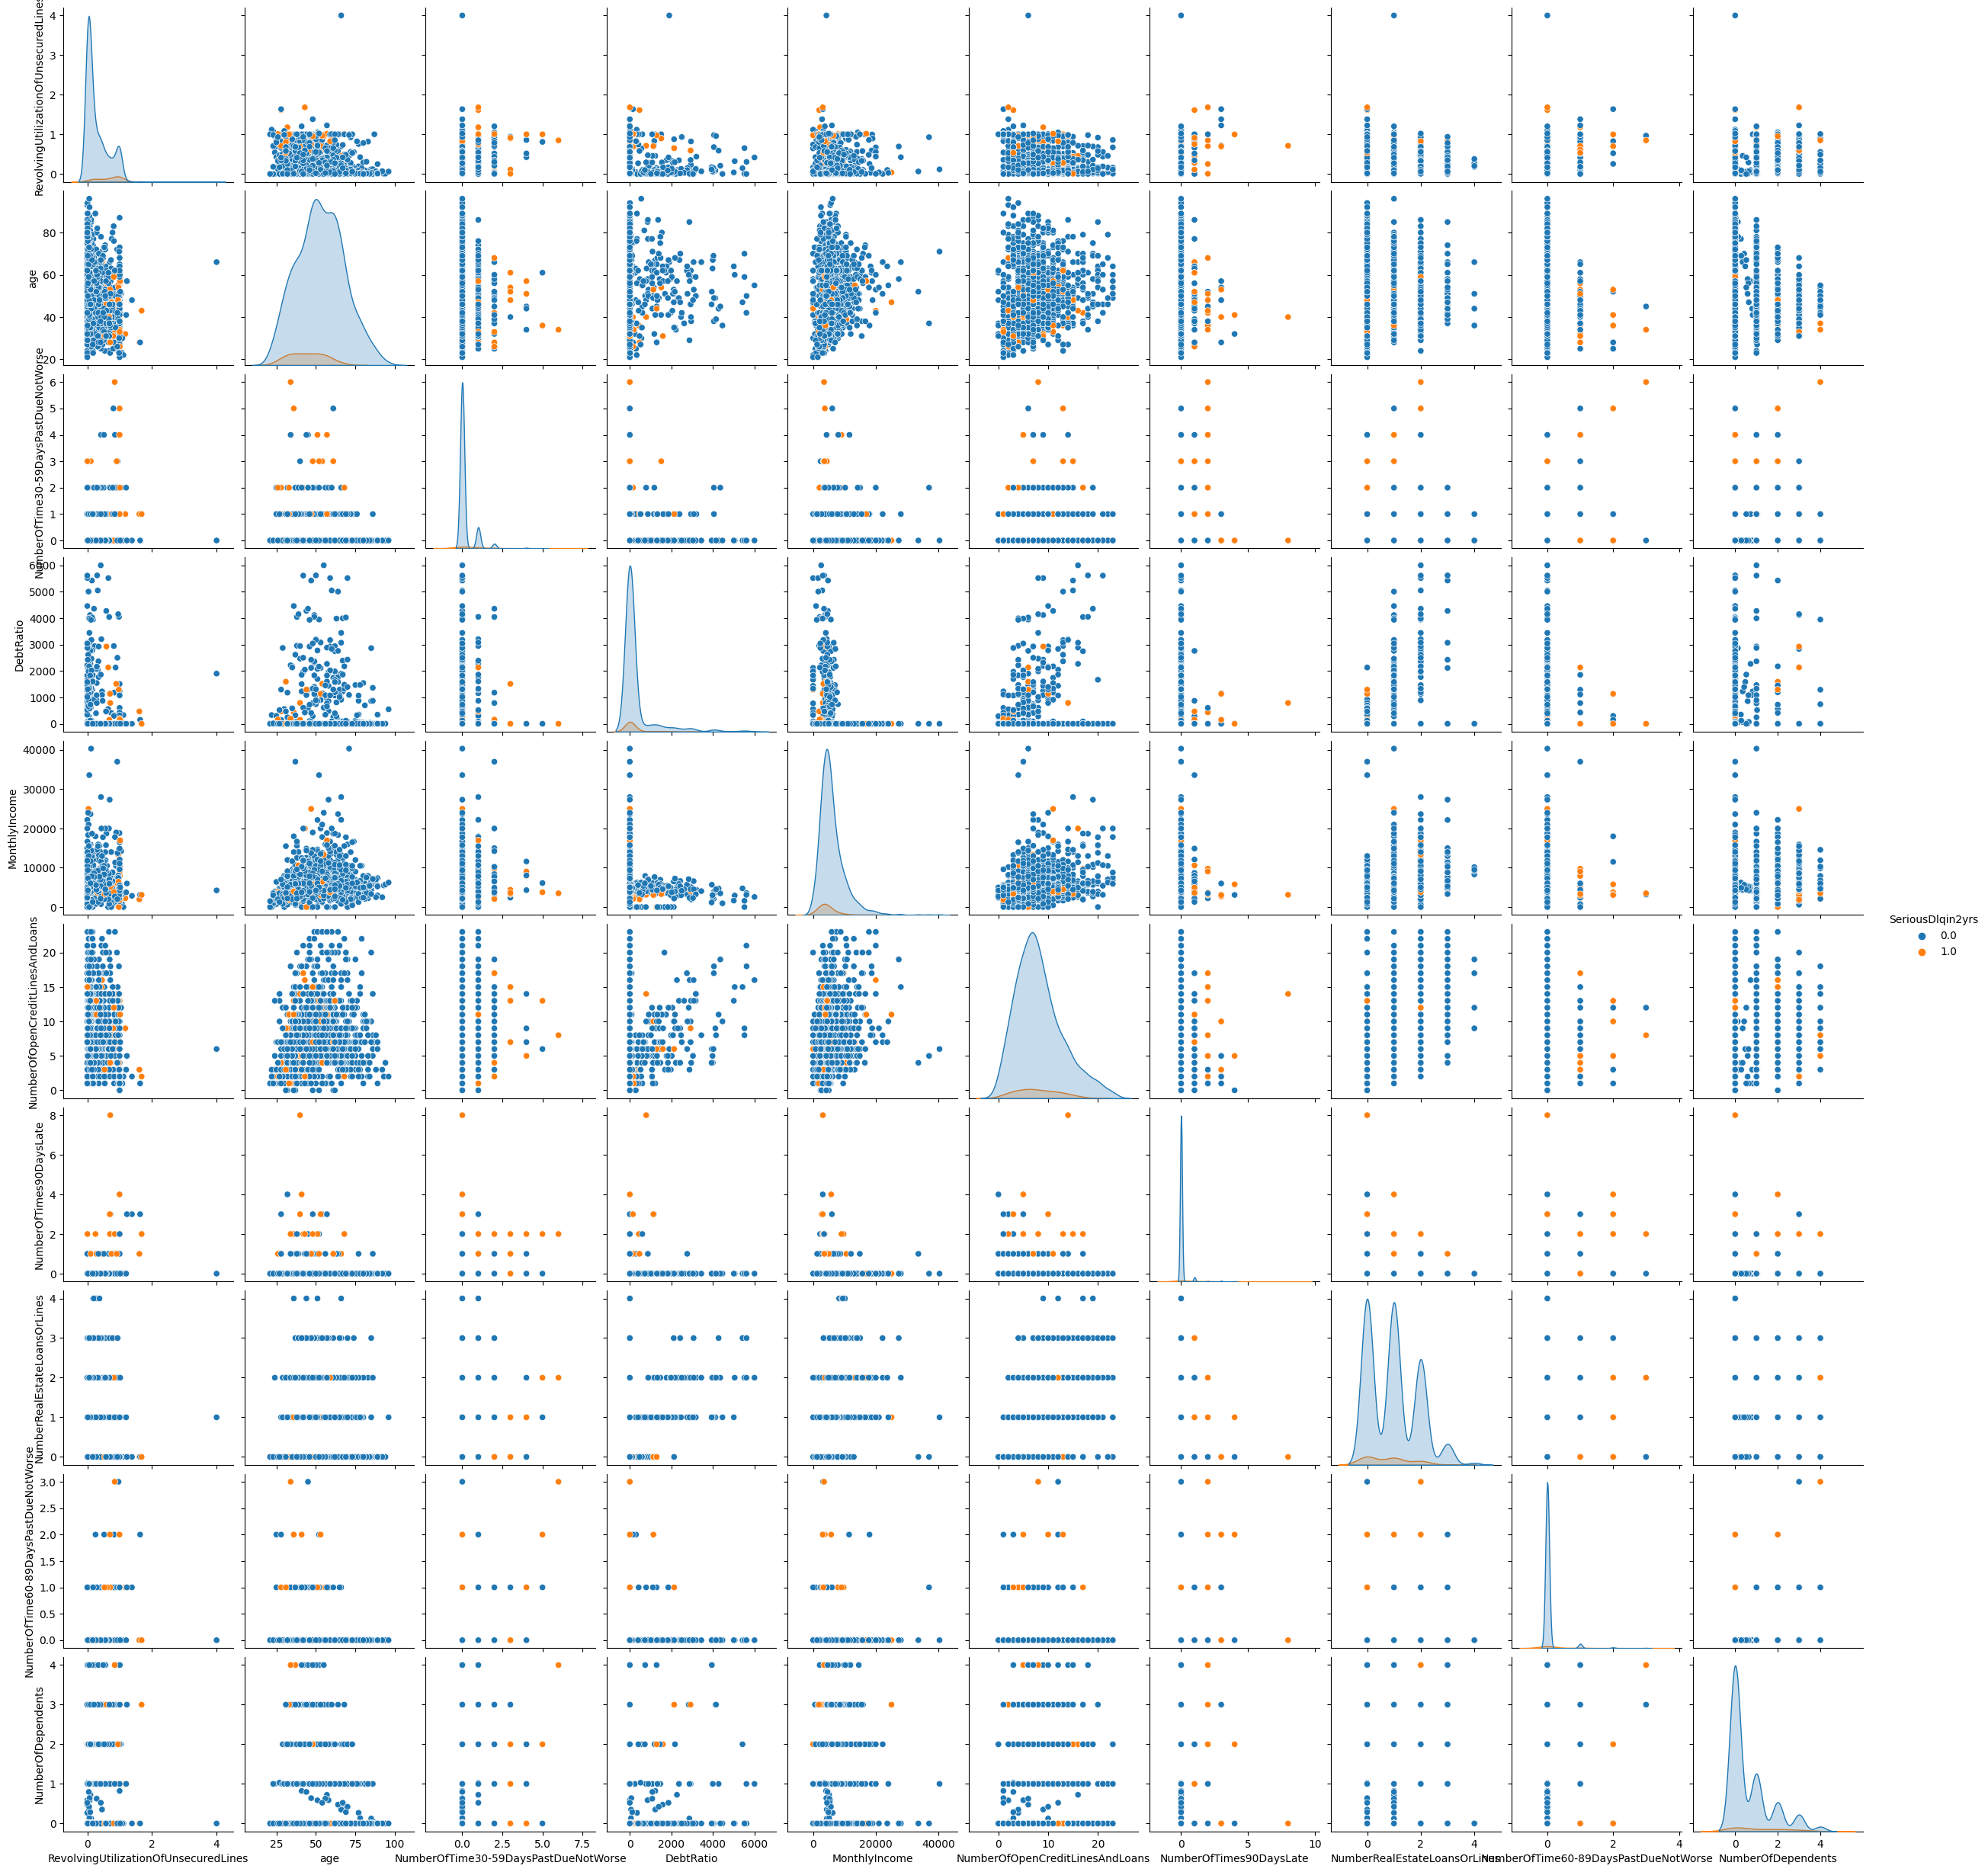

In [41]:
sb.pairplot(train_df_filtered.sample(n=1000), hue="SeriousDlqin2yrs")

##### Observing distribution of variables

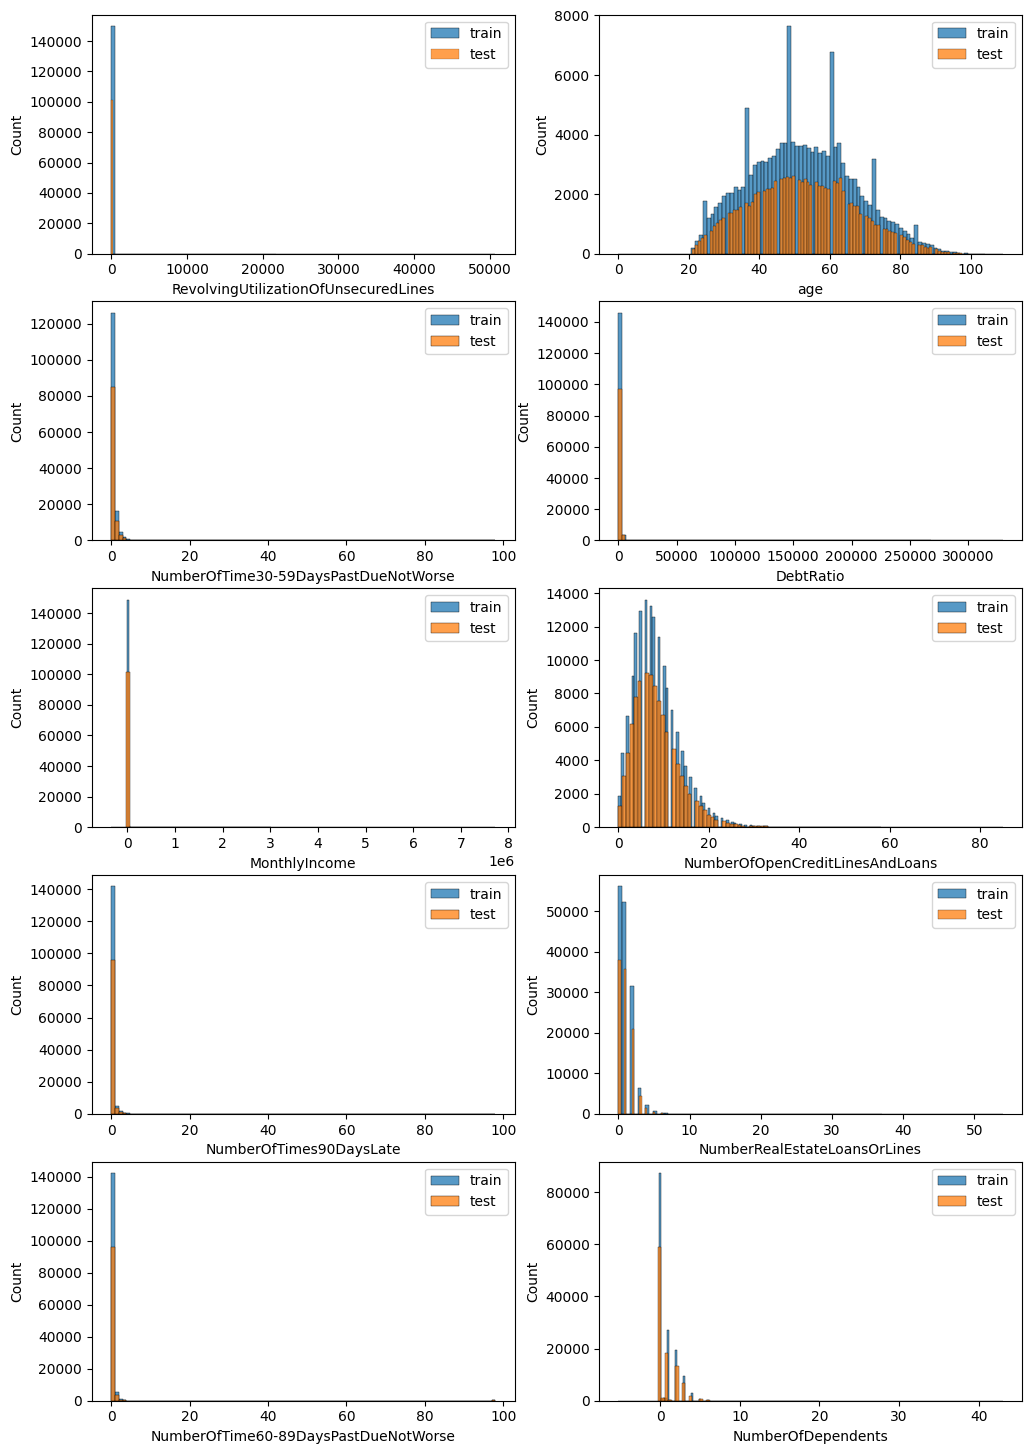

In [51]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,18))
cols = train_df_imputed.columns.drop("SeriousDlqin2yrs")
for i, col in enumerate(cols):
    plt.subplot(5, 2, i+1)
    sb.histplot(data=train_df_imputed, x=col, bins=100, label="train")
    sb.histplot(data=test_df_imputed, x=col, bins=100, label="test")
    plt.legend()

plt.show()

We can see in the graphs above that the ranges of each variable are vastly different. It is therefore necessary to normalize or standardize the data, as performed below. Note that I use standardization instead of normalization because standardization is less vulnerable to outliers, which may be significant as per the plots above (see plot on bottom left for an example).

In [52]:
train_df_filtered.loc[:, train_df_filtered.columns != "SeriousDlqin2yrs"] = train_df_filtered.loc[:, train_df_filtered.columns != "SeriousDlqin2yrs"].apply(lambda x: (x - x.mean()) / x.std())
test_df_filtered = test_df_filtered.apply(lambda x: (x - x.mean()) / x.std())
train_df_filtered.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.0,0.074361,-0.826750,-0.350897,-0.345175,-0.812749,-0.901915,-0.191029,-1.016573,-0.196871,0.271416
2,0.0,0.032678,-0.961534,1.099944,-0.345217,-0.703524,-1.337014,1.917744,-1.016573,-0.196871,-0.695109
3,0.0,-0.026488,-1.500672,-0.350897,-0.345273,-0.639768,-0.684366,-0.191029,-1.016573,-0.196871,-0.695109
5,0.0,-0.029364,1.464586,-0.350897,-0.344883,-0.590345,-1.119465,-0.191029,0.055105,-0.196871,0.271416
6,0.0,-0.016467,0.318918,-0.350897,6.207007,-0.822817,-0.031718,-0.191029,2.198462,-0.196871,-0.695109


##### Analysing Class Balance

array([[<AxesSubplot: title={'center': 'SeriousDlqin2yrs'}>]],
      dtype=object)

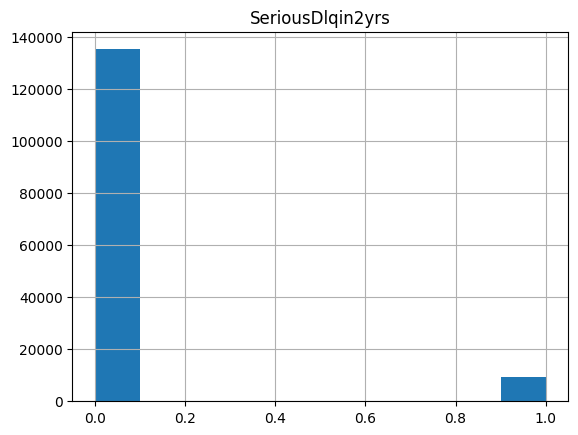

In [53]:
train_df_filtered.hist(column="SeriousDlqin2yrs")

This histogram shows that the number of negatives far exceeds the number of positives. We can try to adjust the class balance using a technique called synthetic minority oversampling, which creates new synthetic datapoints in between k nearest neighbours of the minority, for a variable k. It is advisible to oversample instead of undersample because the number of datapoints in the minority class is very little (under 10000), which is why this technique is reasonable.

In [54]:
X = train_df_filtered.loc[:, train_df_filtered.columns != "SeriousDlqin2yrs"].to_numpy()
y =  train_df_filtered.loc[:, train_df_filtered.columns == "SeriousDlqin2yrs"].to_numpy().squeeze()
sm = SMOTE(random_state=628)
X_balanced, y_balanced = sm.fit_resample(X, y)

In [55]:
print(X_balanced.shape)
print(y_balanced.shape)

(270320, 10)
(270320,)
